In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sys

In [7]:
def find_tresh_val(feature, tresholds):
    tresh_val = []
    for i in range(len(tresholds)-1):
        a = tresholds[i]
        b = tresholds[i+1]
        mean_val = df[(df[feature] > a) & (df[feature] < b)][feature].mean()
        tresh_val.append(mean_val)
    return tresh_val

def convert(x, feature, tresholds: list, tresh_val: list):
    for i in range(len(tresholds)-1):
        a = tresholds[i]
        b = tresholds[i+1]
        if (x > a and x < b):
            return round(tresh_val[i], 1)

In [8]:
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']

In [9]:
chunks = pd.read_csv('train_data.csv', chunksize=32768, encoding = 'utf-8', sep = ',')
df = chunks.get_chunk()
print('RAM use {0} MBit'.format(round(sys.getsizeof(df)/2**20), 1))

RAM use 53 MBit


In [10]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


## Удаление пропусков

Посмотрим на пропуски в данных:

In [11]:
NA = df.isna().mean()
NA = pd.DataFrame({'features': NA.index, '% NAN': NA.values})

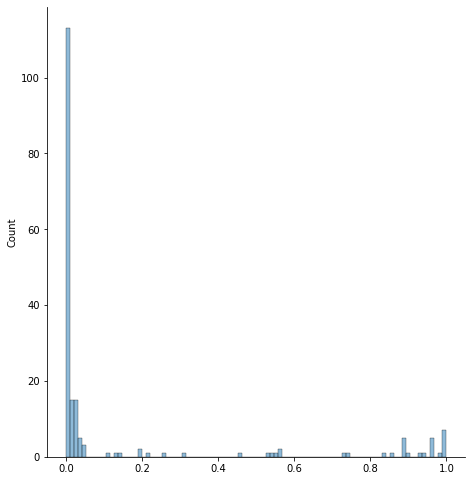

In [12]:
ax = sns.displot(data=NA, legend=False)
ax.fig.set_size_inches(7,7)

Удалим столбцы, где доля пропусков больше 20%:

In [13]:
columns_to_del = NA[NA['% NAN'] > 0.2]['features'].values
df = df.drop(columns_to_del, axis=1)

In [14]:
df.head(3)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,0.002052,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,0.001034,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.005681,0.005497,0.009227,0.009123,0.003269,0.007329,0.000427,0.003429,0.006986,0.002603


In [15]:
festures = df.drop(['customer_ID', 'S_2'], axis=1).columns.to_list()

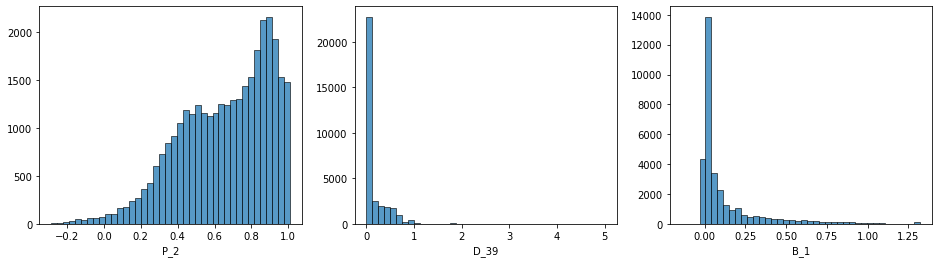

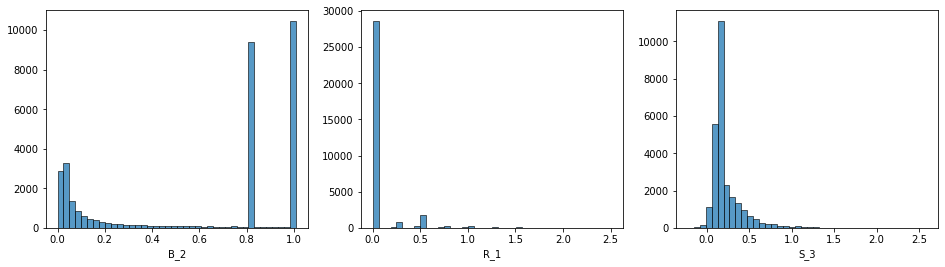

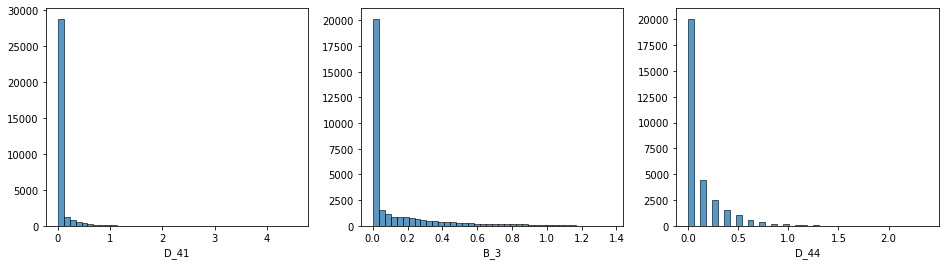

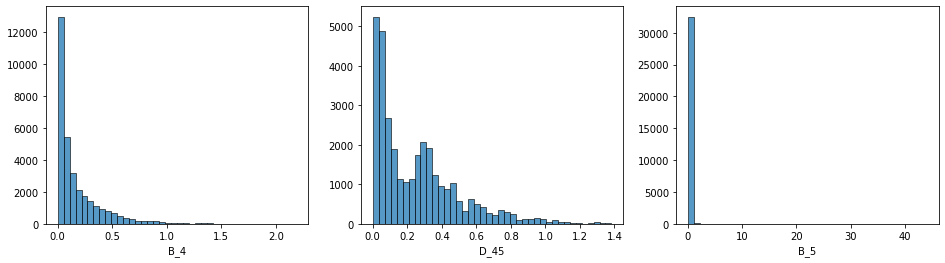

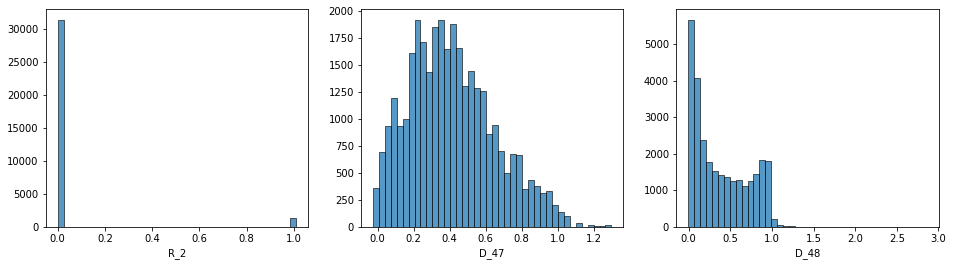

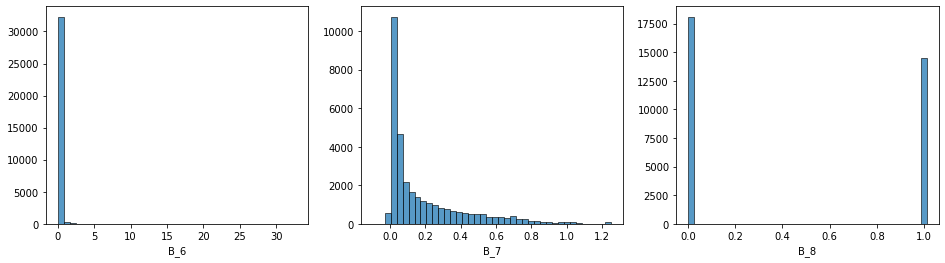

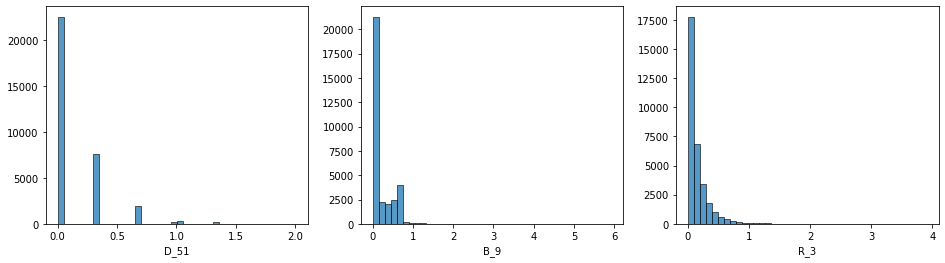

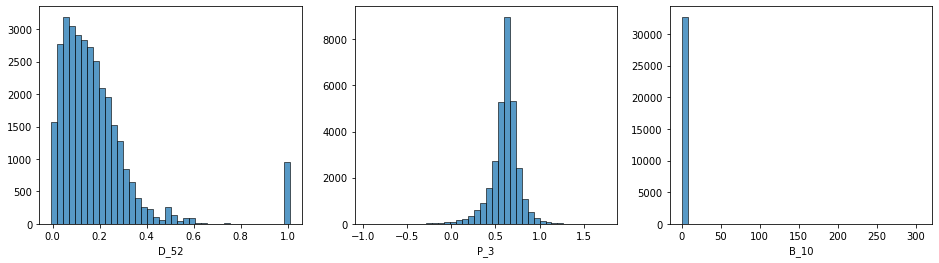

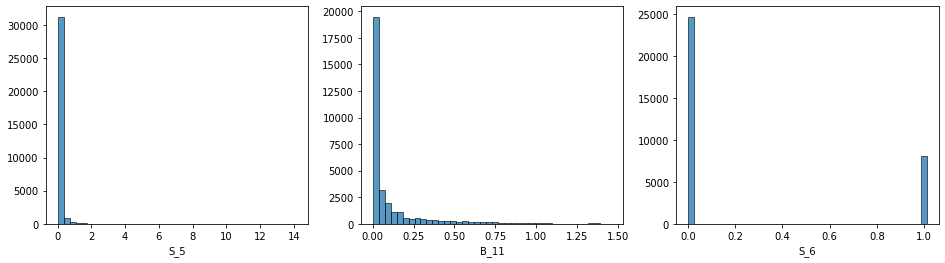

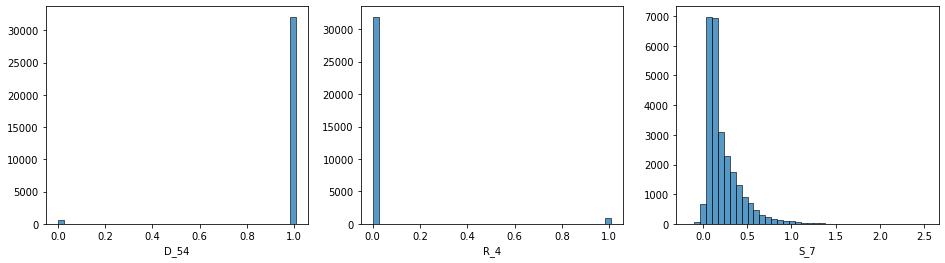

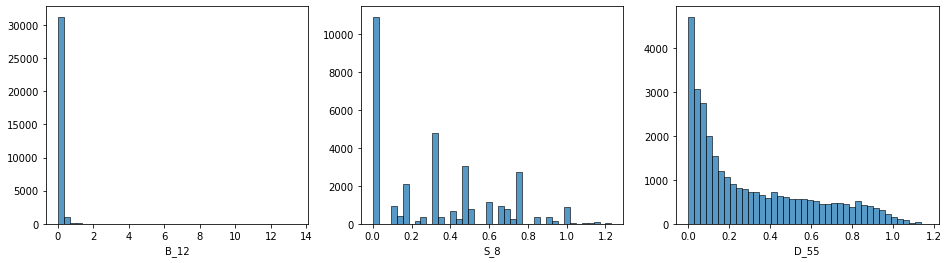

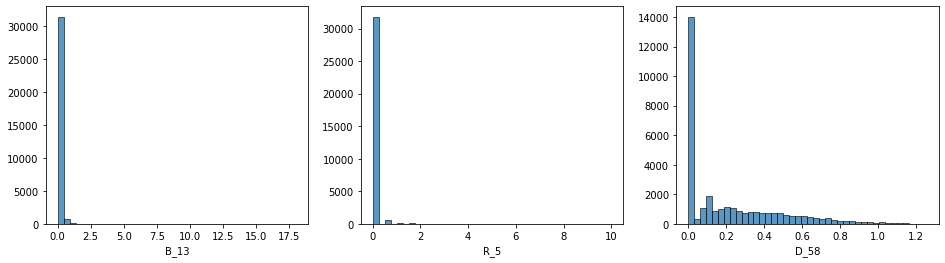

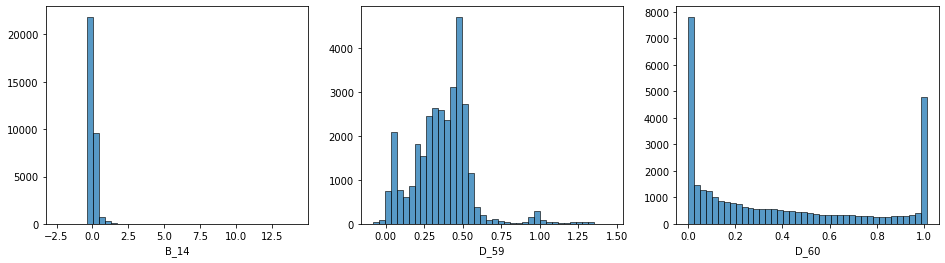

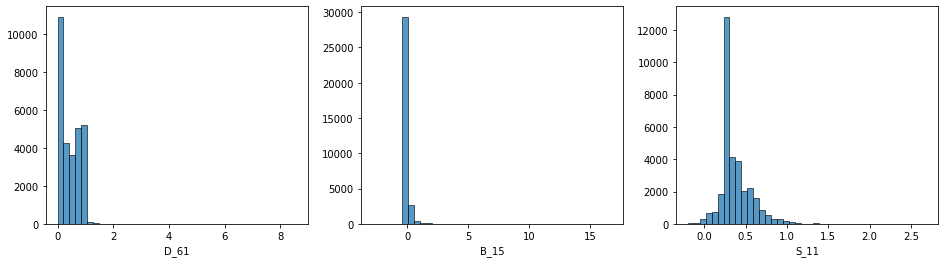

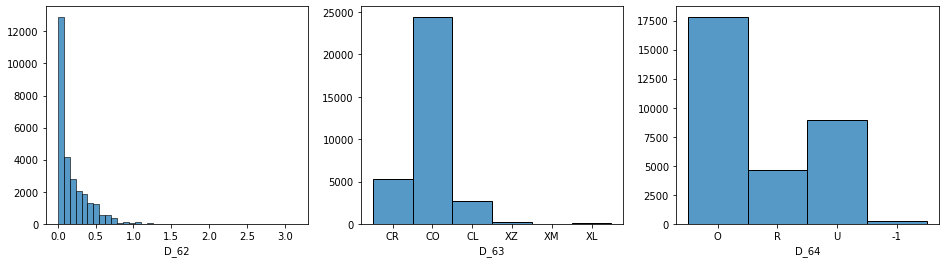

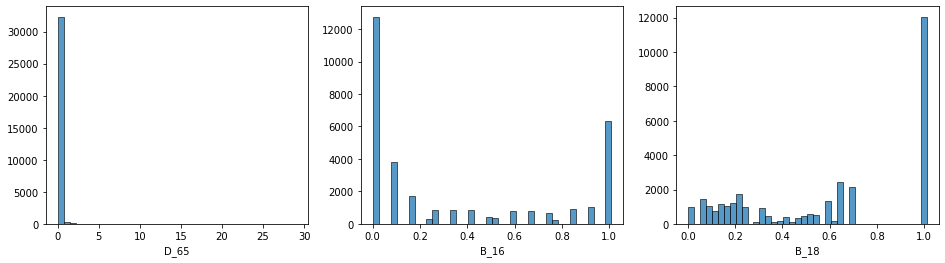

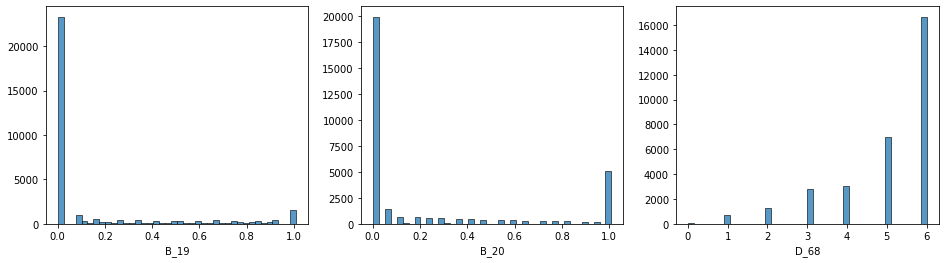

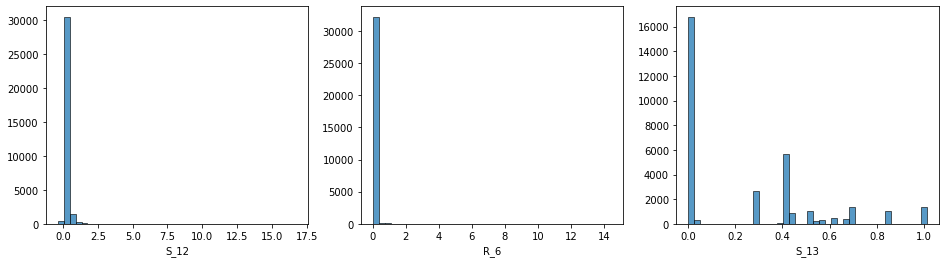

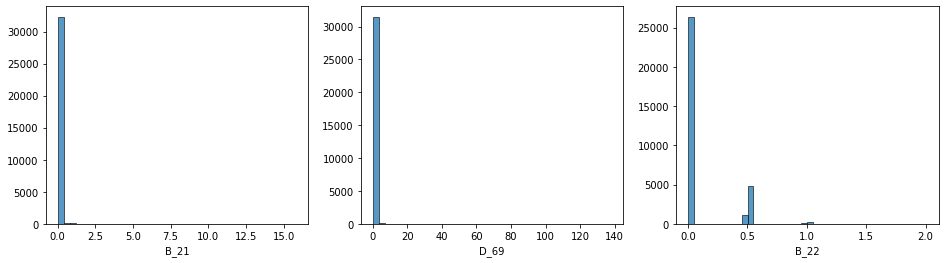

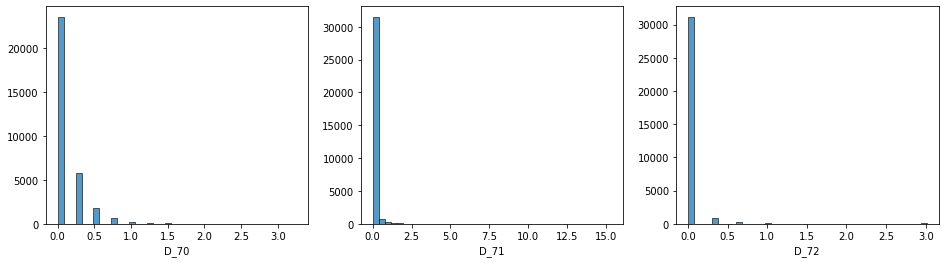

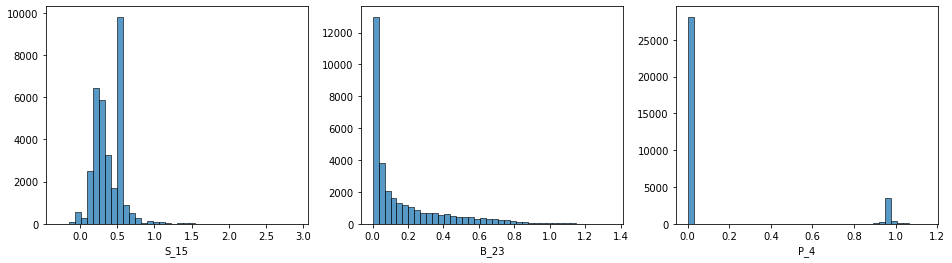

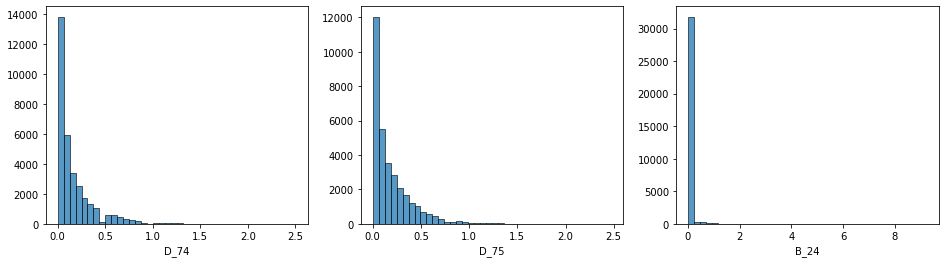

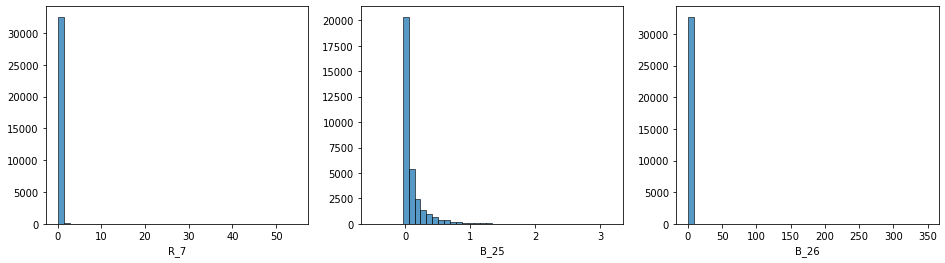

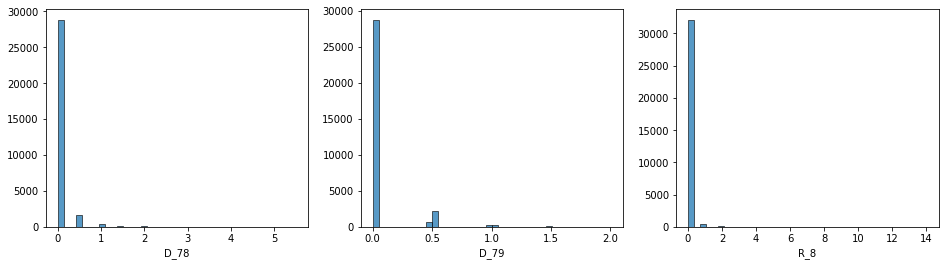

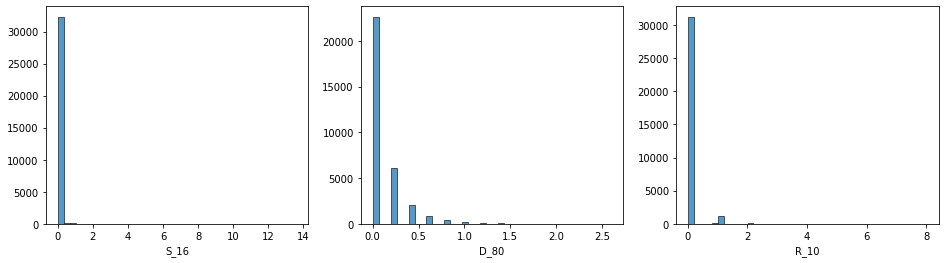

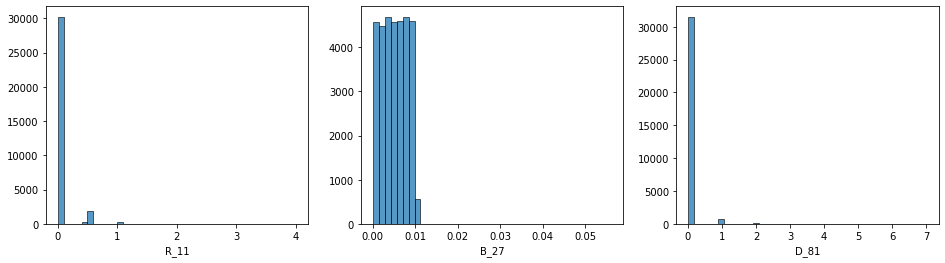

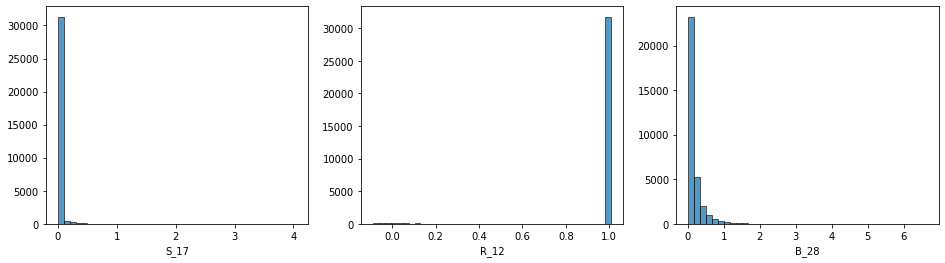

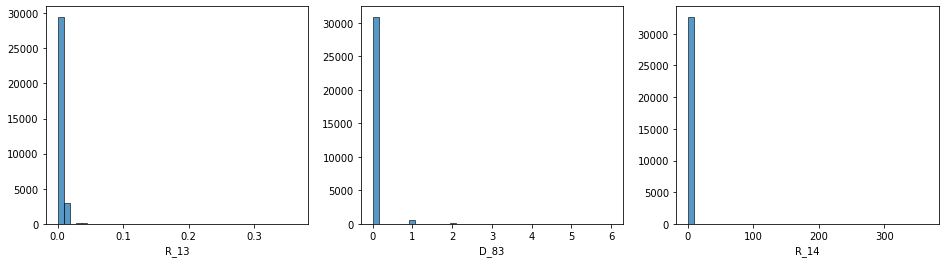

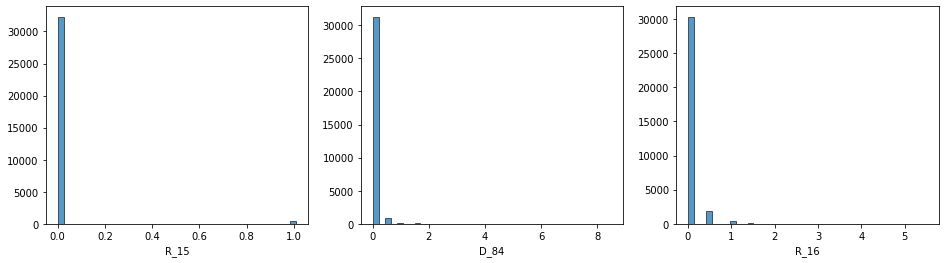

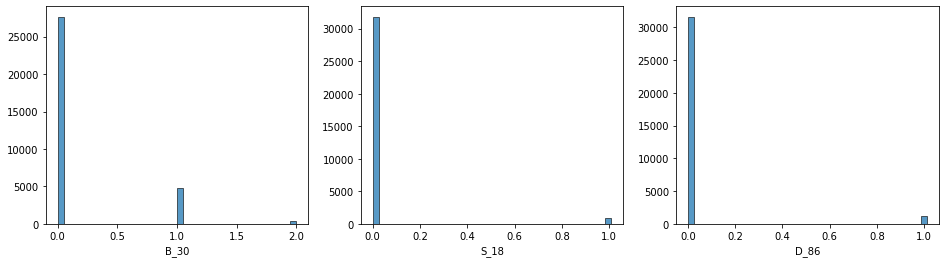

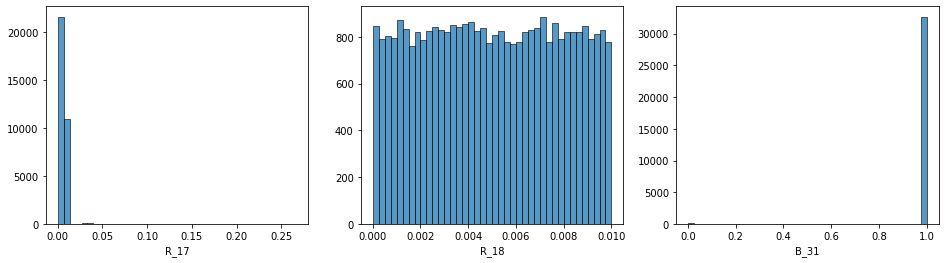

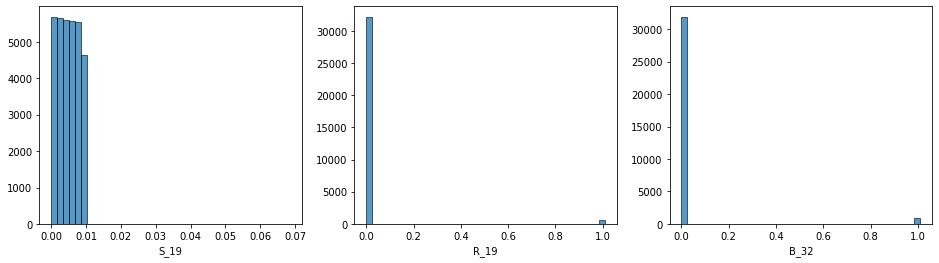

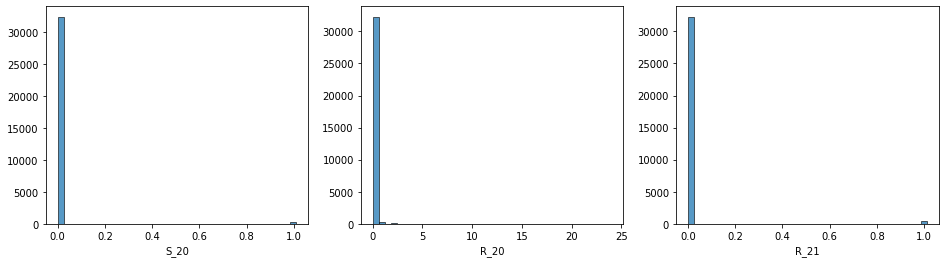

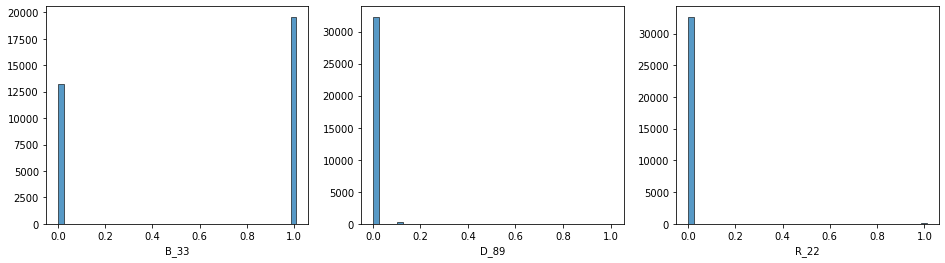

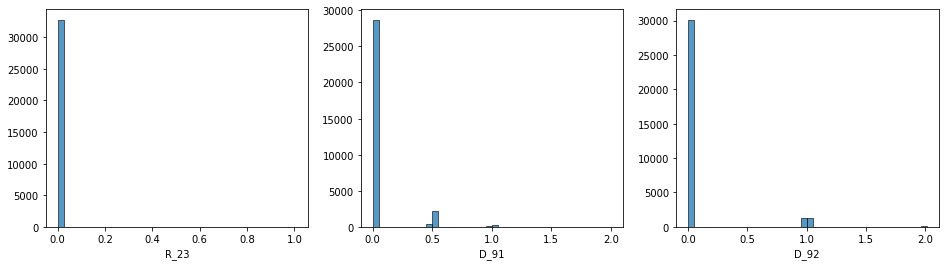

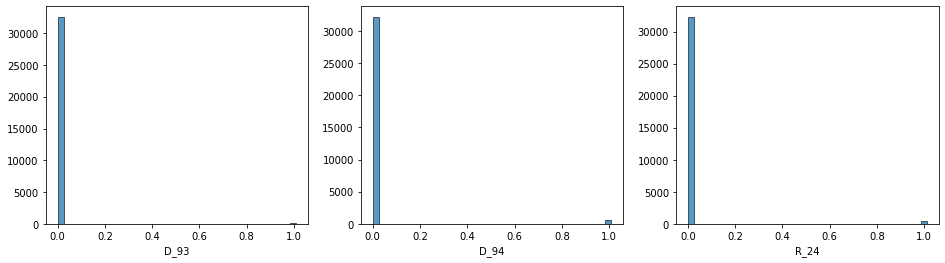

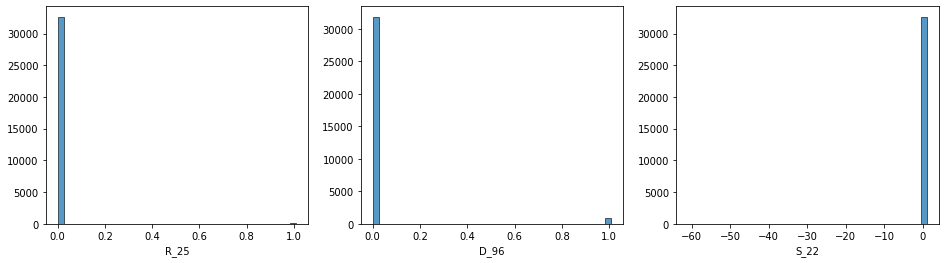

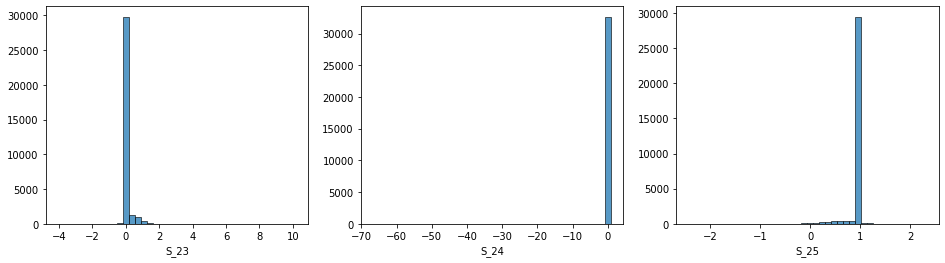

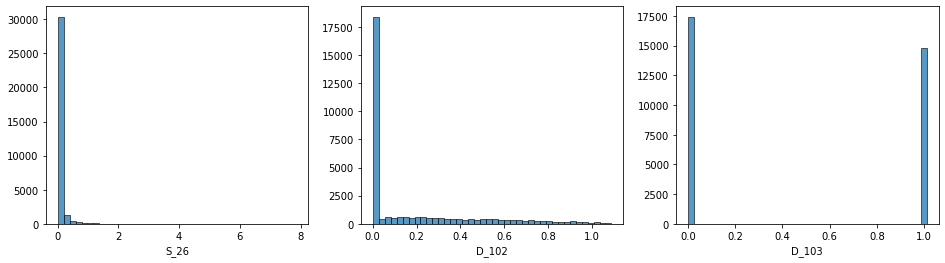

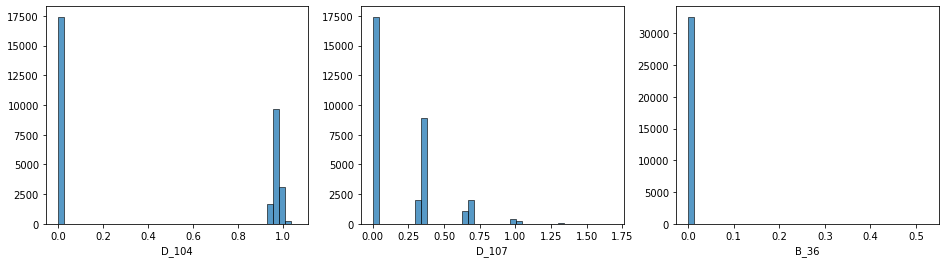

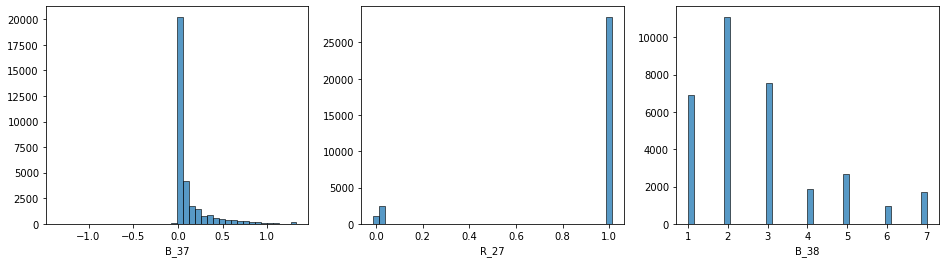

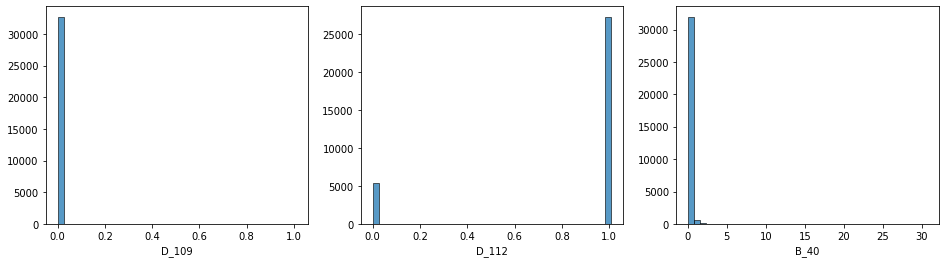

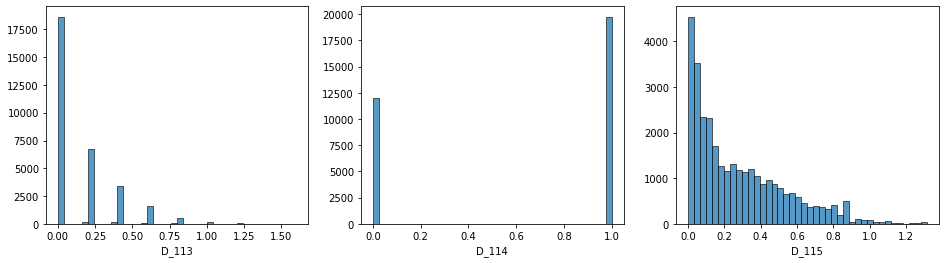

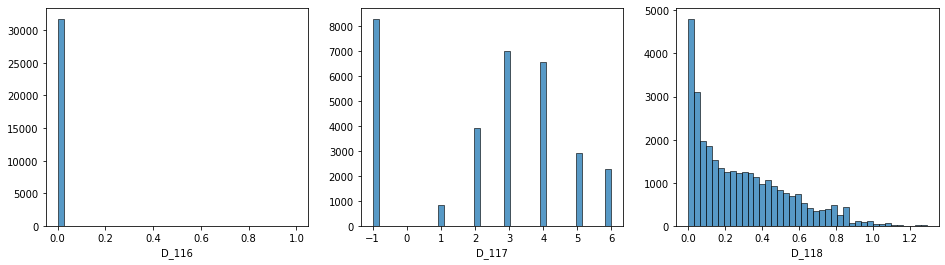

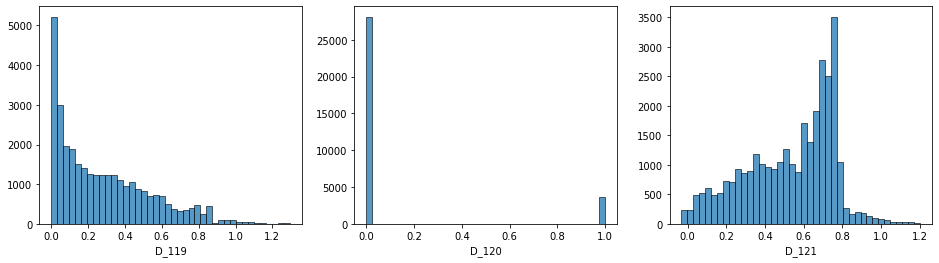

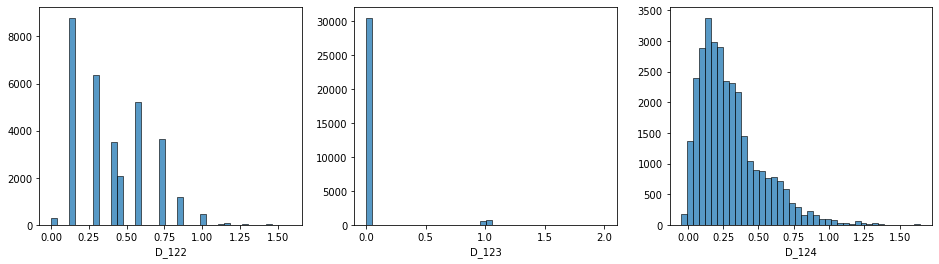

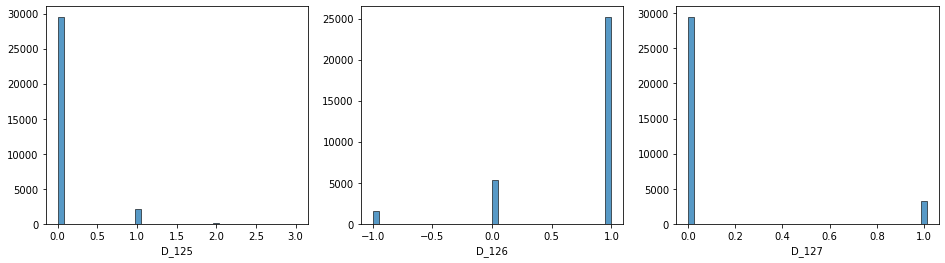

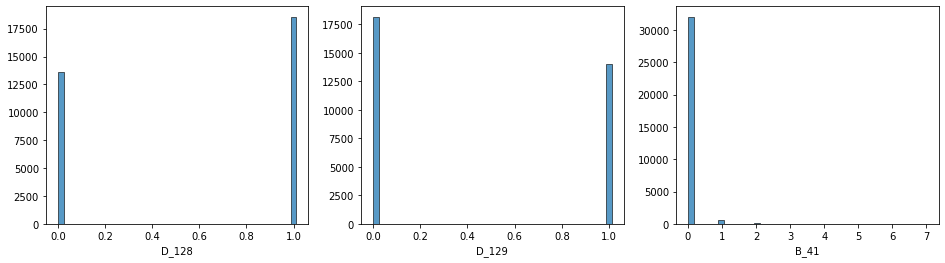

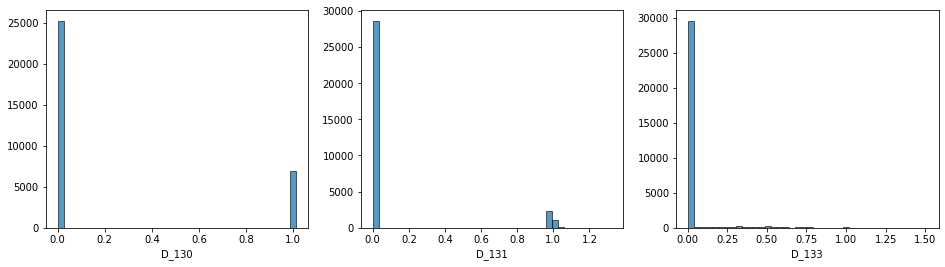

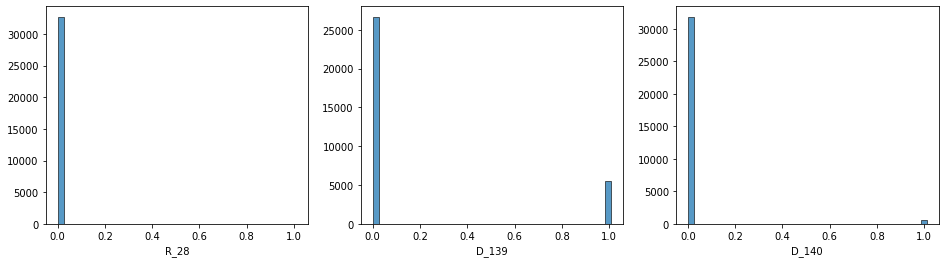

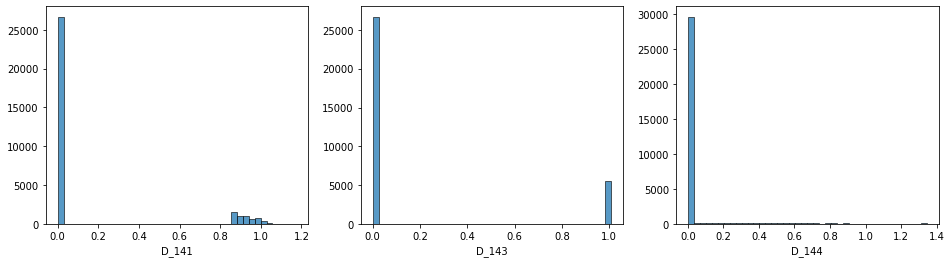

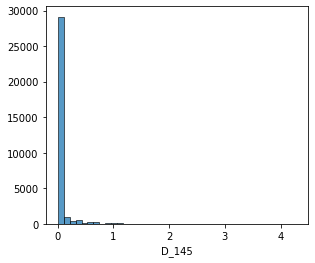

In [16]:
ind = 0
for col in festures: 
    if ind % 3 == 0:
        plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, ind % 3 + 1)
    
    sns.histplot(data=df, x=col, bins=40)
    plt.ylabel("")
    
    if ind % 3 == 2:
        plt.show()
    
    ind += 1

In [17]:
feat = ['D_51', 'B_22', 'D_70', 'D_79', 'D_80', 'D_81', 'R_12', 'D_91', 'D_92', 'D_107', 'D_113', 'D_126']

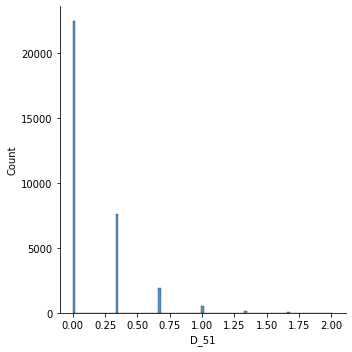

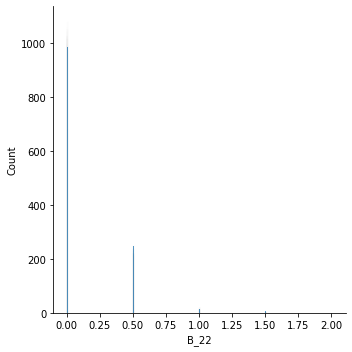

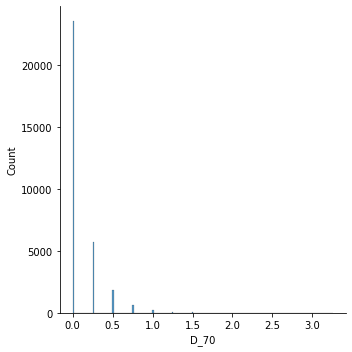

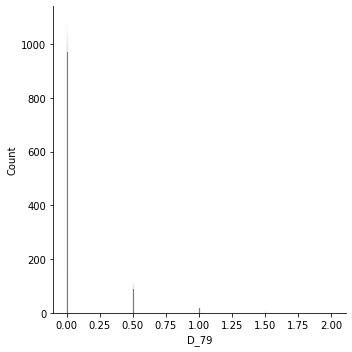

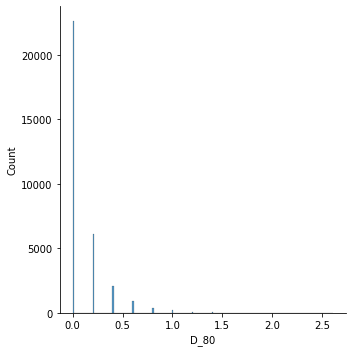

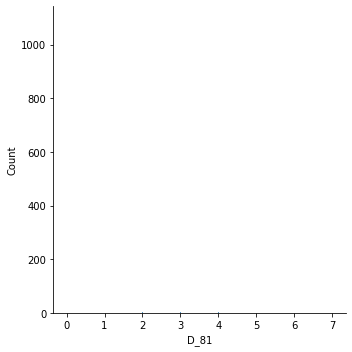

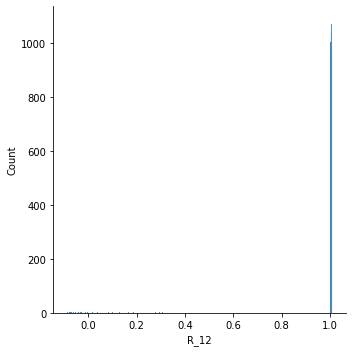

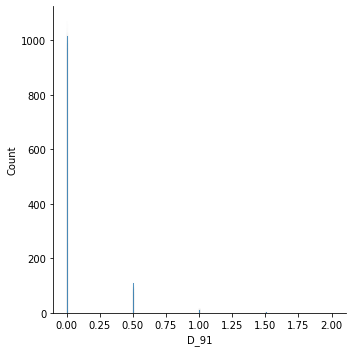

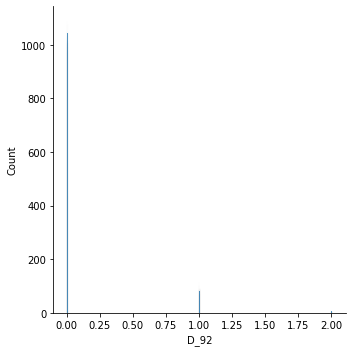

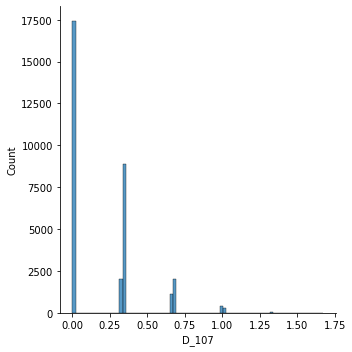

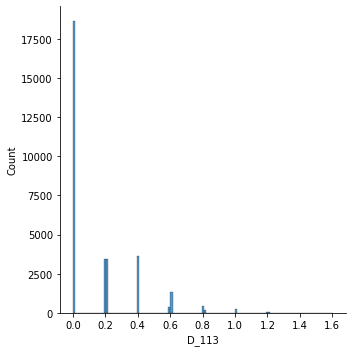

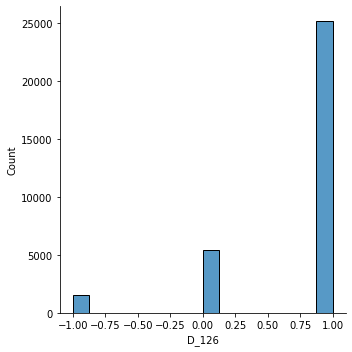

In [18]:
for f in feat:
    sns.displot(data=df, x=f)

In [19]:
'D_51' : [0, 0.2, 0.5,0.8, 1.1], 
'B_22' : [0, 0.2, 0.7],
'D_70' : [0, 0.2, 0.4, 0.6, 0.8],
'D_79' : [0, 0.2, 0.7],
'D_80' : [0, 0.2, 0.4, 0.6, 0.8],
'R_12' : [-1, 0.4, 2],
'D_91' : [0, 0.2, 0.7],
'D_92' : [0. 0.5, 1.5],
'D_107': [0, 0.2, 0.5, 0.8, 1.2],
'D_113': [0, 0.1, 0.3, 0.5, 0,7, 0.9]

SyntaxError: invalid syntax (<ipython-input-19-f53acf0aa348>, line 1)

Признаки R_2, B_8, S_6, D_54, R_4, P_4, B_33, D_103, D_104, R_27, D_112, D_123, D_127, D_128, D_129, D_130, D_131, D_139, D_141, D_143 можно преобразовать в категориальные

In [ ]:
tresholds_for_features = dict({
                               'R_2'  : [0, 0.3, 1.3],
                               'B_8'  : [-0.1, 0.3, 1.3],
                               'S_6'  : [0, 0.3, 1.3],
                               'D_54' : [-0.1, 0.3, 1.3],
                               'R_4'  : [0, 0.3, 1.3], 
                               'P_4'  : [0, 0.3, 1.3], 
                               'B_33' : [0, 0.3, 1.3], 
                               'D_103' : [0, 0.3, 1.3], 
                               'D_104' : [0, 0.3, 1.3], 
                               'R_27'  : [0, 0.3, 1.3],  
                               'D_112' : [0, 0.3, 1.3], 
                               'D_123' : [0, 0.3, 1.3], 
                               'D_127' : [0, 0.3, 1.3], 
                               'D_128' : [0, 0.3, 1.3], 
                               'D_129' : [0, 0.3, 1.3], 
                               'D_130' : [0, 0.3, 1.3], 
                               'D_131' : [0, 0.3, 1.3], 
                               'D_139' : [0, 0.3, 1.3], 
                               'D_141' : [0, 0.3, 1.3], 
                               'D_143' : [0, 0.3, 1.3],
                               'D_51' : [0, 0.2, 0.5,0.8, 1.1], 
                               'B_22' : [0, 0.2, 0.7],
                               'D_70' : [0, 0.2, 0.4, 0.6, 0.8],
                               'D_79' : [0, 0.2, 0.7],
                               'D_80' : [0, 0.2, 0.4, 0.6, 0.8],
                               'R_12' : [-1, 0.4, 2],
                               'D_91' : [0, 0.2, 0.7],
                               'D_92' : [0, 0.5, 1.5],
                               'D_107': [0, 0.2, 0.5, 0.8, 1.2],
                               'D_113': [0, 0.1, 0.3, 0.5, 0,7, 0.9]
                               
})

In [ ]:
for feature in tqdm(tresholds_for_features):
    tresh_val = find_tresh_val(feature, tresholds_for_features.get(feature))
    df[feature] = df[feature].apply(lambda x: convert(x, feature, tresholds_for_features.get(feature), tresh_val))

In [ ]:
cat_features += list(tresholds_for_features.keys())

In [20]:
def unique_count(x):
    return x.value_counts().shape[0]
unique = lambda x: unique_count(x)
unique.__name__ = 'unique'
grouped = df[cat_features+['customer_ID']].groupby('customer_ID').agg(unique)

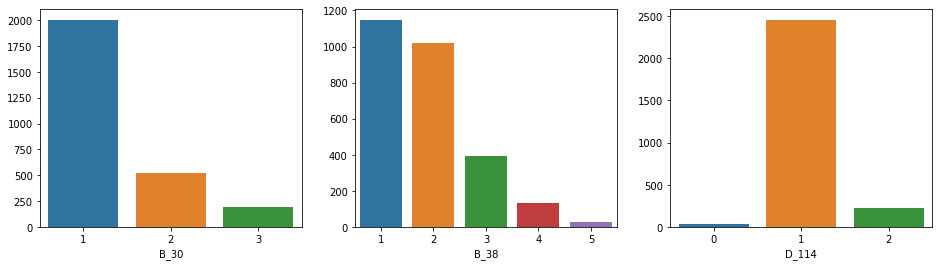

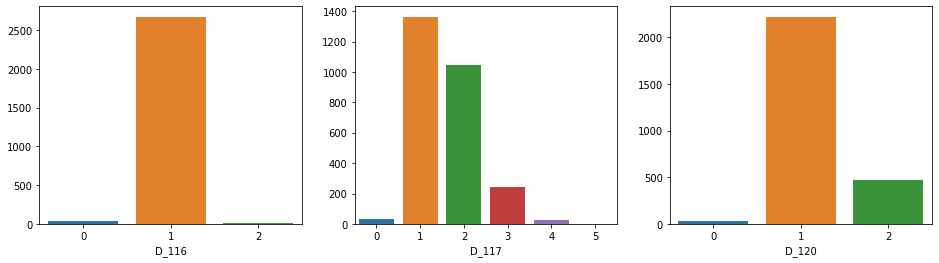

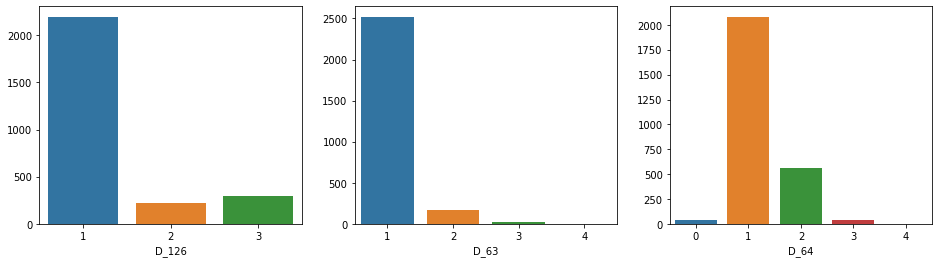

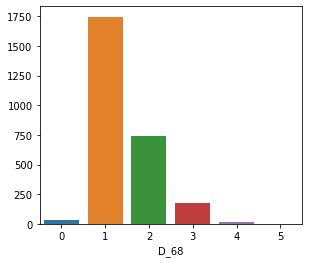

In [21]:
ind = 0
for col in cat_features:
    if ind % 3 == 0:
        plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, ind % 3 + 1)
    
    sns.countplot(data=grouped, x=col)
    plt.ylabel("")
    
    if ind % 3 == 2:
        plt.show()
    ind += 1

## Обработка категориальных признаков

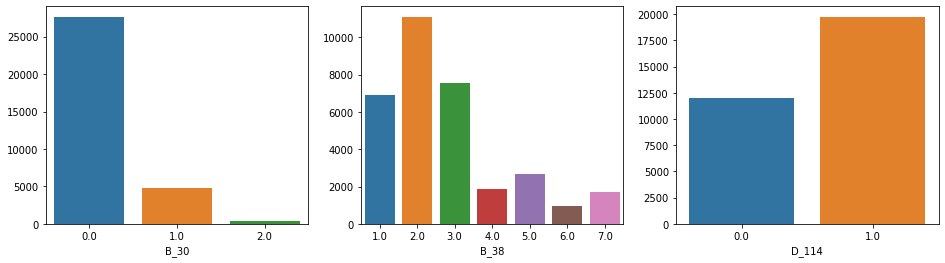

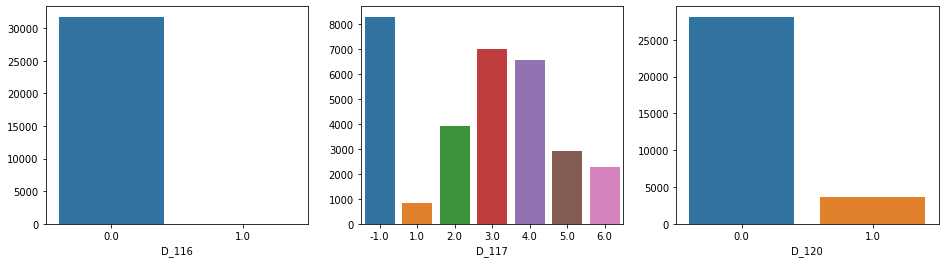

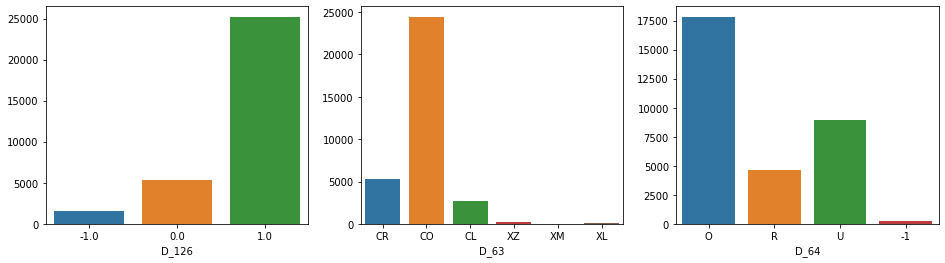

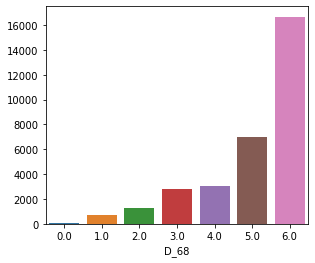

In [22]:
ind = 0
for col in cat_features:
    if ind % 3 == 0:
        plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, ind % 3 + 1)
    
    sns.countplot(data=df, x=col)
    plt.ylabel("")
    
    if ind % 3 == 2:
        plt.show()
    ind += 1

In [23]:
ignore = ['B_30_2.0', 'D_116_1.0', 'D_126_-1.0', 
          'D_63_XL', 'D_63_XM', 'D_63_XZ', 
          'D_64_-1', 'D_68_0.0', 'D_68_1.0', 
          'R_2_1.0', 'D_54_0.0', 'R_4_1.0', 'D_123_1.0']

In [24]:
res = []
for feature in cat_features:
    res.append(df[feature].mode().values[0])
global_modes_val = dict(zip(cat_features, res))

customers = df.customer_ID.unique()
clear_cat = pd.DataFrame()
for customer in tqdm(customers):
    customer_data_cat = df[df['customer_ID'] == customer][cat_features]
    if (1 in customer_data_cat.isna().mean().values):
        clear_cat = pd.concat([clear_cat, customer_data_cat.fillna(value=global_modes_val)])
    elif customer_data_cat.shape[0] >= 1:
        values = dict(zip(cat_features, customer_data_cat.mode().values[0]))
        clear_cat = pd.concat([clear_cat, customer_data_cat.fillna(value=values)])
df[cat_features] = clear_cat

100%|██████████████████████████████████████████████████████████████████████████████| 2718/2718 [00:29<00:00, 91.27it/s]


In [25]:
continuous_features = df.drop(cat_features+['customer_ID', 'S_2'], axis=1).columns.to_list()
res = []
for feature in continuous_features:
    res.append(df[feature].median())
continuous_val = dict(zip(continuous_features, res))
df = df.fillna(value=continuous_val)

In [26]:
def last_day(date):
    time_interval = date.split('-')
    year, month, day = int(time_interval[0]), int(time_interval[1]), int(time_interval[2])
    if (day == calendar.monthrange(year, month)[1]):
        return 1
    return 0

def next_month(date):
    time_interval = date.split('-')
    year, month, day = int(time_interval[0]), int(time_interval[1]), time_interval[2]
    month = month+1
    if month == 13:
        year, month = year+1, 1
    if ((month == 2) and (int(day)>28)):
        day = 28
    if((month == 4 or month == 6 or month == 9 or month == 11) and (int(day)==31)):
        day = 30
    if int(month/10) == 0:
        month = '0'+str(month)
    new_date = [str(year), str(month), str(day)]
    return '-'.join(new_date)

def transform_date(customer):
    payment_history_val = customer.S_2.values
    payment_history = pd.Series(payment_history_val)
    res = [payment_history.values[0]]
    for i in range(payment_history.shape[0]-1):
        res.append(next_month(res[i]))
    ser = pd.Series(res, copy=False)
    actual_date = pd.to_datetime(payment_history)
    desirable_date = pd.to_datetime(ser)
    mean_diff = 0
    for diff in (actual_date - desirable_date).iloc:
        mean_diff += diff.days
    mean_diff = mean_diff/payment_history.shape[0]
    def sigmoid(x):
        return 1 / (1 + np.exp(-0.5*x))
    return sigmoid(mean_diff)


In [27]:
res = []
for customer in tqdm(customers):
    customer_data = df[df['customer_ID'] == customer]
    res.append(transform_date(customer_data))

100%|█████████████████████████████████████████████████████████████████████████████| 2718/2718 [00:11<00:00, 226.54it/s]


In [28]:
categ_df = pd.get_dummies(df[cat_features], columns=cat_features)
categ_df['customer_ID'] = df['customer_ID']

In [29]:
categ_df.groupby('customer_ID').agg('sum').reset_index()

,customer_ID,B_30_0.0,B_30_1.0,B_30_2.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,...,D_64_O,D_64_R,D_64_U,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,13,0,0,0,13,0,0,0,0,...,13,0,0,0,0,0,0,0,0,13
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,13,0,0,0,13,0,0,0,0,...,13,0,0,0,0,0,0,0,0,13
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,13,0,0,13,0,0,0,0,0,...,0,13,0,0,0,0,0,0,0,13
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,13,0,0,0,13,0,0,0,0,...,13,0,0,0,0,2,9,0,0,2
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,13,0,0,7,6,0,0,0,0,...,13,0,0,0,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,018ae26e65c26fc167a0be8b2657b95c591b9f3ae0c3ad...,13,0,0,0,13,0,0,0,0,...,0,0,13,0,0,0,9,4,0,0
2714,018af01ca37dc01a02ac6c89b400b1a6ba57b15a2979d9...,13,0,0,0,13,0,0,0,0,...,0,13,0,0,0,0,0,0,0,13
2715,018b0aa4447e34dfd6ae03ecdafad46d028f1d99543388...,12,0,1,0,0,12,0,1,0,...,9,0,4,0,0,0,0,0,8,5
2716,018b577a59e93802af1d3613ffd4f1b1a626f5111df4e5...,13,0,0,12,1,0,0,0,0,...,0,0,13,0,0,0,0,0,0,13


In [30]:
%%time
def quantile(x, q):
    return np.quantile(x, q)

quantile_025 = lambda x: quantile(x,0.25)
quantile_025.__name__ = '025'

quantile_075 = lambda x: quantile(x,0.75)
quantile_075.__name__ = '075'


continuous_features = df.drop(cat_features+['S_2', 'customer_ID'], axis=1).columns.to_list()
functions = [['mean', 'std', 'max', 'min', 'first', 'last']]*len(continuous_features)
dict_agg = dict(zip(continuous_features, functions))

Wall time: 18 ms


In [31]:
%%time
df_grouped = df.groupby('customer_ID').agg(dict_agg).reset_index()
df_grouped.columns = ['customer_ID']+[c[0]+'_'+c[1] for c in df_grouped.columns[1:]]

Wall time: 593 ms


###### Обработанный датасет:

In [34]:
df_grouped.head()

,customer_ID,P_2_mean,P_2_std,P_2_max,P_2_min,P_2_first,P_2_last,D_39_mean,D_39_std,D_39_max,...,D_144_max,D_144_min,D_144_first,D_144_last,D_145_mean,D_145_std,D_145_max,D_145_min,D_145_first,D_145_last
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.024194,0.960384,0.868580,0.938469,0.934745,0.010704,0.024444,0.091505,...,0.009616,0.000610,0.000610,0.002970,0.005814,0.003294,0.009827,0.000995,0.002674,0.008533
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.022119,0.929122,0.861109,0.929122,0.880519,0.215205,0.199150,0.567403,...,0.009568,0.000027,0.000027,0.003169,0.004902,0.002729,0.009390,0.000796,0.002629,0.008514
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.028911,0.904482,0.797670,0.876615,0.880875,0.004181,0.002758,0.009704,...,0.009415,0.000129,0.002738,0.000834,0.004500,0.002152,0.006932,0.000443,0.000443,0.003444
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.020108,0.623392,0.567442,0.567442,0.621776,0.048862,0.088466,0.268476,...,0.009919,0.000492,0.001873,0.005560,0.005236,0.003406,0.009836,0.000029,0.007589,0.002983
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.042325,0.940382,0.805045,0.936842,0.871900,0.004644,0.002882,0.008680,...,0.009436,0.000633,0.003867,0.006944,0.004219,0.003426,0.009666,0.000083,0.001375,0.000905
